In [1]:
import os, sys
sys.path.insert(0, "/home/zhubenjin/repos/det3d.velocity.pytorch/src")

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [3]:
import nuscenes
from nuscenes.nuscenes import NuScenes

In [4]:
nusc = NuScenes(version='v1.0-trainval', dataroot='/mnt/local0/nuScenes', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 52.6 seconds.
Reverse indexing ...
Done reverse indexing in 14.3 seconds.


In [ ]:
print(dir(nusc))

In [ ]:
# nuScenes 的 annotations 以 table 的形式组织，每个 table 有自己的主键，还有指向其他 table 的外键
nusc.table_names

In [ ]:
print(len(nusc.scene))
for i, scene in enumerate(nusc.scene):
    print(i, scene['description'])

In [ ]:
for i in nusc.category:
    print(i['description'], '+++++++++++', i['name'])

In [ ]:
nusc.instance[0].keys()

In [ ]:
nusc.get('sample_annotation', nusc.instance[0]['first_annotation_token'])

In [ ]:
nusc.visibility

In [ ]:
# translation and the rotation parameters are given with respect to the ego vehicle body frame.
print(len(nusc.sensor))
nusc.sensor

In [ ]:
print(len(nusc.calibrated_sensor)) # 12 * 850 = 10200
nusc.calibrated_sensor[0].keys()

In [ ]:
# ego_pose contains information about the location (encoded in translation) and the orientation (encoded in rotation) 
# of the ego vehicle body frame, with respect to the global coordinate system.
print(len(nusc.ego_pose), len(nusc.sample_data))
nusc.ego_pose[0].keys()

In [ ]:
print(len(nusc.log))
nusc.log[0]

In [ ]:
print(len(nusc.map))
nusc.map[0]

In [ ]:
len(nusc.sample) # 28130 + 6019

In [ ]:
sample = nusc.sample[20]
print(sample.keys())
print(sample['data'])
print(nusc.get('sample_data', sample['data']['LIDAR_TOP'])['is_key_frame'])
print(nusc.get('sample_data', nusc.get('sample', sample['next'])['data']['LIDAR_TOP'])['is_key_frame'])

In [ ]:
print(len(nusc.sample_data)) # 2631083 / 34149
print(nusc.sample_data[0].keys())
len(nusc.field2token("sample_data", "sample_token", sample['token']))

In [ ]:
print(help(nusc.list_sample))

In [ ]:
nusc.list_attributes()

In [ ]:
nusc.list_categories()

In [ ]:
nusc.render_pointcloud_in_image(sample['token'], pointsensor_channel='LIDAR_TOP')

In [ ]:
nusc.render_sample_data(sample['data']['CAM_FRONT'])

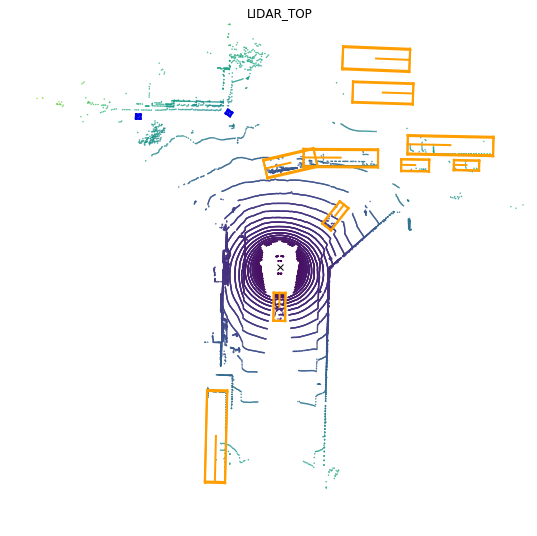

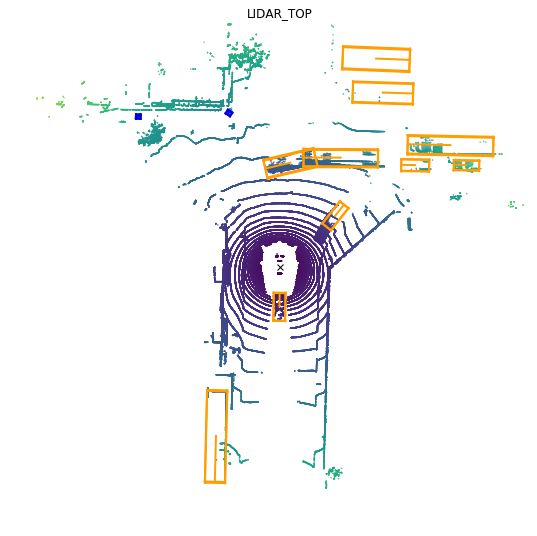

In [6]:
sample = nusc.get('sample', 'd5fec51f35dc444cb1752e74eb066097')
nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=1)
nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=10)

In [ ]:
nusc.render_annotation(sample['anns'][13])

In [ ]:
nusc.render_scene_channel(nusc.scene[0]['token'], 'CAM_FRONT')

In [ ]:
nusc.render_egoposes_on_map(log_location='singapore-onenorth')

In [ ]:
anntoken = '9f450bf6b7454551bbbc9a4c6e74ef2e'
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']

print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)

In [ ]:
# Map information is stored as binary semantic masks from a top-down view. 